# Capstone Project: The Battle of Neighborhoods
This project will leverage the use of Foursquare data in coming up with a solution to an identified problem.

## Table of Contents
+ [Introduction](#Introduction)
+ [Problem and Objective](#Problem)
+ [Description of the Data](#Description)
+ [Methodology](#Methodology)
+ [Data Analysis](#Analysis)
+ [Results](#Results)
+ [Discussion](#Discussion)
+ [Conclusion and Recommendations](#Conclusion)
+ [Acknowledgement](#Acknowledgement)

## Introduction <a name="Introduction"></a>
Metro Manila is the busiest area in the Philippines. Although it doesn't host the beautiful natural landscapes and beaches which Philippines is known for, this location gives a multicultural experience from lavish shopping malls, to historical parks, and to exotic street food that reflects that Philippine culture. Filipinos from the different provinces and even foreigners flock to Metro Manila to find leisure, recreational activities, education, work and many more. With the constant influx of population, no wonder this area has been bustling with different business opportunities, and one of which is the real estate business. The demand for housing has been increasing every year and for many real estate developers, the question in mind is "where do we develop our next project?" 

## Problem and Objective <a name="Problem"></a>
With the growing demand in housing in Metro Manila, there is a huge opportunity for real estate developers to capture existing and even build new markets. This case study will help recommend the most suitable type of condominiums to develop around Metro Manila. The establishment can be tailored fit to different market profiles and this study will include a description of each clustered neighborhood that will be identified with the machine learning technique that will be used. 

## Description of the Data <a name="Description"></a>
The following data will be used to come up with the recommendation for the case study:
+ Population data from the Philippine Statistics Authority ([PSA](http://openstat.psa.gov.ph/)) indicating the population per city in Metro Manila in 2000, 2010 and 2015 will be used where the population growth rate shall be derived. In addition, 2010 population demographics by sex and age group will be utilized to describe the population.
+ Latitudes and longitudes of each city will be generated using the Geopy library. 
+ Foursquare API keys will be utilized to call the establishments near the cities that have been identified.
+ A map will be generated through the use of Folium library to visualize the clustered locations.
+ Clustered locations will be described according to venue categories as provided by the Foursquare API.

## Methodology <a name="Methodology"></a>
This study will identify the most suitable types of condominiums to develop in the different cities in Metro Manila.

First, we will describe the population through the use of the dataset from the Philippine Statistics Authority (PSA). Visualization techniques will be leveraged to understand the demographics. An article by Lamudi will also be referenced to support the discussion. This will explore the current market situation and sentiments of real estate consumers.

Second, geographical coordinate of each city will be generated using Geopy library. Foursquare API will be utilized to identifiy the venues around the cities.

Third and last, the cities in Metro Manila will be mapped out using Folium library. These will be clustered based on the most common venue categories around them using k-Means clustering algorithm. By doing this, the relationship between the different cities can be identified where conclusions can be drawn up as recommendation to condominium developers.

## Data Analysis <a name="Analysis"></a>

##### Import Libraries
Relevant libraries were imported to be used in the anaylsis.

In [14]:
import pandas as pd # library to handle dataframes

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


![alt text](https://www.lamudi.com.ph/journal/wp-content/uploads/2018/11/asian-family-696x328.jpg)

Lamudi is an online real estate classified website focusing exclusively on the emerging markets. They published an online article on their analysis on customer behavior who were using their website. The findings suggests that the top 3 age groups that uses their platform are 25-34, 35-44, and 45-54 with share views of condominiums for sale at 37.04%, 22.64%, and 15.21%, respectively. In addition, they found out that 55% of views are comprised of femailes. We can look in the the population by age group and sex and see the potential market for condominiums.

In another online article, they were able to conclude that location is the best indicator of the value of the condominium regardless of the age of the customer and regardless of the city where the establishment is located.

Sources
+ [Millennials Fueling Surge in Condominium Development in the Philippines, Lamudi 2018](https://www.lamudi.com.ph/journal/millennials-fueling-surge-in-condominium-development-in-the-philippines/)
+ [The Outlook 2018’s Property Seeker Survey: Revealing the Pulse of the Filipino Property Seeker, Lamudi 2018](https://www.lamudi.com.ph/journal/the-outlook-2018s-property-seeker-survey-revealing-the-pulse-of-the-filipino-property-seeker/)

### Investigate the dataset from PSA.
1. Describe the Metro Manila Population Demographics.
2. Generate a map pinpointing the cities of Metro Manila.

##### Import excel file containing Metro Manila Population Demographics from the Philippine Statistical Authority (PSA).
This will be used to describe the population by age group and sex. Dataset has been uploaded in this project and we have inserted this as pandas dataframe.

In [18]:
body = client_89ca758a52c344798e462f0a325e493c.get_object(Bucket='myproject-donotdelete-pr-0lgvdgfyv0zzal',Key='MM Population Demographics.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pop_demo = pd.read_excel(body)
df_pop_demo.head()

,Unnamed: 0,Below 5,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,35-39.1,40-44.1,45-49.1,50-54.1,55-59.1,60-64.1,65-69.1,70-74.1,75-79.1,80 and over.1
0,City of Manila,83611,80851,76951,80866,85561,80144,69898,56838,50361,...,56093,52066,45324,38811,29755,22769,13273,10847,7298,6925
1,City of Mandaluyong,15194,15297,14493,15185,16983,16959,14548,11996,10097,...,12200,11036,10459,8789,5925,4433,2609,2124,1301,1339
2,City of Marikina,19126,20300,21090,20783,19998,18712,17347,14863,13703,...,15551,14545,12327,10460,8231,6485,3838,3170,2069,1895
3,City of Pasig,33683,33385,32202,29843,31446,32407,30478,25728,21221,...,26108,22205,17926,15320,11498,8808,5045,3846,2452,2261
4,Quezon City,143170,138317,133959,133765,136397,130991,116652,97503,85439,...,100645,90484,76832,63701,46451,33163,19997,15644,10000,10714


As seen in the list of columns, there are duplicates in the age group. The first set of columns are for male and the rest are for female. This was pre-processed to make the analysis simpler.

##### Pre-process the Metro Manila Population Demographics dataset for visualization.

In [112]:
# Rename the columns to make these uniform.
columns_list = ['City', 'Below 5', '5-9', '10-14', '15-19', '20-24', '25-29',
       '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80 and over', 'Below 5', '5-9', '10-14', '15-19', '20-24', '25-29',
       '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80 and over']
df_pop_demo.columns = columns_list

In [108]:
# Shape and listed columns are printed and df_pop_demo dataframe is shown.
print(df_pop_demo.shape)
print(df_pop_demo.columns)
df_pop_demo

(17, 35)
Index(['City', 'Below 5', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80 and over', 'Below 5', '5-9', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80 and over'],
      dtype='object')


,City,Below 5,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 and over
0,City of Manila,83611,80851,76951,80866,85561,80144,69898,56838,50361,...,56093,52066,45324,38811,29755,22769,13273,10847,7298,6925
1,City of Mandaluyong,15194,15297,14493,15185,16983,16959,14548,11996,10097,...,12200,11036,10459,8789,5925,4433,2609,2124,1301,1339
2,City of Marikina,19126,20300,21090,20783,19998,18712,17347,14863,13703,...,15551,14545,12327,10460,8231,6485,3838,3170,2069,1895
3,City of Pasig,33683,33385,32202,29843,31446,32407,30478,25728,21221,...,26108,22205,17926,15320,11498,8808,5045,3846,2452,2261
4,Quezon City,143170,138317,133959,133765,136397,130991,116652,97503,85439,...,100645,90484,76832,63701,46451,33163,19997,15644,10000,10714
5,City of San Juan,4512,4634,4827,5038,5330,5353,4900,4266,3798,...,4830,4824,4207,3434,2537,2194,1081,981,890,1091
6,Caloocan City,82393,80733,78936,74581,70863,66322,61173,52185,47161,...,51533,47022,40522,32931,23910,17635,10089,7799,4525,4073
7,City of Malabon,18195,18679,18063,17387,17029,15970,15070,12720,11317,...,12356,11196,9647,8307,6150,4697,2767,2119,1317,1274
8,City of Navotas,14610,14117,13224,12421,11846,11053,10363,8865,7816,...,8487,7625,6438,5348,4004,3023,1751,1284,813,639
9,City of Valenzuela,31599,30182,28724,26828,28436,28652,26328,21826,18130,...,20874,17795,14862,12180,9099,6449,3719,2843,1669,1443


In the next set of cells, the dataset will be split by sex and the total population per age group will be generated. These will be visualized using bar plots.

##### Separate Male and Female dataset and get the sum of the population per age group.

In [113]:
# Transpose the dataset to have age group as index.
# Male dataset
df_pop_male = df_pop_demo.iloc[0:, 0:18]
df_pop_male = df_pop_male.set_index("City")
df_pop_male.index.name = None
df_pop_male = df_pop_male.transpose()

# Female dataset
df_pop_female = pd.concat([df_pop_demo.iloc[0:, 0], df_pop_demo.iloc[0:, 19:35]], axis=1, sort=False)
df_pop_female = df_pop_female.set_index("City")
df_pop_female.index.name = None
df_pop_female = df_pop_female.transpose()

In [114]:
# Get the sum of the population per age group.
df_pop_male["Total NCR"] = df_pop_male.sum(axis=1)
df_pop_male

,City of Manila,City of Mandaluyong,City of Marikina,City of Pasig,Quezon City,City of San Juan,Caloocan City,City of Malabon,City of Navotas,City of Valenzuela,City of Las Pinas,City of Makati,City of Muntinlupa,City of Paranaque,Pasay City,Pateros,Taguig City,Total NCR
Below 5,83611,15194,19126,33683,143170,4512,82393,18195,14610,31599,27814,22625,22166,28885,19510,3275,36718,607086
5-9,80851,15297,20300,33385,138317,4634,80733,18679,14117,30182,27828,21666,21859,28358,18278,3247,34081,591812
10-14,76951,14493,21090,32202,133959,4827,78936,18063,13224,28724,27410,21791,21318,28366,17802,3238,31239,573633
15-19,80866,15185,20783,29843,133765,5038,74581,17387,12421,26828,26149,21971,20422,27324,17839,2989,29075,562466
20-24,85561,16983,19998,31446,136397,5330,70863,17029,11846,28436,25581,25697,21863,28000,20493,2979,30908,579410
25-29,80144,16959,18712,32407,130991,5353,66322,15970,11053,28652,24386,27024,23284,27724,20794,2901,32133,564809
30-34,69898,14548,17347,30478,116652,4900,61173,15070,10363,26328,23185,24159,22110,24911,18157,2575,30541,512395
35-39,56838,11996,14863,25728,97503,4266,52185,12720,8865,21826,19607,18632,19086,21318,14205,2321,24545,426504
40-44,50361,10097,13703,21221,85439,3798,47161,11317,7816,18130,16851,16167,16229,18467,12105,2127,20323,371312
45-49,42834,8564,11389,16737,70619,3334,39737,9342,6594,14911,13657,14282,13614,15549,9747,1693,16367,308970


In [115]:
# Get the sum of the population per age group.
df_pop_female["Total NCR"] = df_pop_female.sum(axis=1)
df_pop_female

,City of Manila,City of Mandaluyong,City of Marikina,City of Pasig,Quezon City,City of San Juan,Caloocan City,City of Malabon,City of Navotas,City of Valenzuela,City of Las Pinas,City of Makati,City of Muntinlupa,City of Paranaque,Pasay City,Pateros,Taguig City,Total NCR
5-9,75505,13268,19188,30751,128147,4772,75005,17242,13003,28455,26380,20533,20278,25286,17760,2993,31882,550448
10-14,73430,14000,20073,30612,128697,5009,75281,17136,12725,26930,26050,20854,19872,26041,16890,2970,29950,546520
15-19,86781,15685,21879,32414,144875,6470,76294,17252,12361,27423,28060,25332,21765,28949,19240,3089,30841,598710
20-24,91326,17587,21724,35526,150922,7291,73237,17064,11691,29414,28702,30965,23501,31946,22718,3161,33469,630244
25-29,82686,17366,20050,35126,140641,7019,68361,16200,10964,28703,27780,32085,23554,30857,22239,3053,33788,600472
30-34,68739,14662,17941,31782,120753,5838,60994,14774,9590,25656,24810,26026,20335,26727,17913,2765,30068,519373
35-39,56093,12200,15551,26108,100645,4830,51533,12356,8487,20874,20845,20953,16682,22764,14464,2283,23887,430555
40-44,52066,11036,14545,22205,90484,4824,47022,11196,7625,17795,18095,18789,14550,20570,12451,2140,20423,385816
45-49,45324,10459,12327,17926,76832,4207,40522,9647,6438,14862,15419,15926,12330,17399,10319,1762,16921,328620
50-54,38811,8789,10460,15320,63701,3434,32931,8307,5348,12180,12960,14379,10743,14288,8391,1489,13798,275329


In [116]:
# Create separate dataframes for male and female total population.
df_pop_male_total = df_pop_male[["Total NCR"]]
df_pop_female_total = df_pop_female[["Total NCR"]]

In [117]:
df_pop_male_total

,Total NCR
Below 5,607086
5-9,591812
10-14,573633
15-19,562466
20-24,579410
25-29,564809
30-34,512395
35-39,426504
40-44,371312
45-49,308970


In [118]:
df_pop_female_total

,Total NCR
5-9,550448
10-14,546520
15-19,598710
20-24,630244
25-29,600472
30-34,519373
35-39,430555
40-44,385816
45-49,328620
50-54,275329


##### Visualize the Metro Manila Population Demographics dataset by plotting it using a histogram.

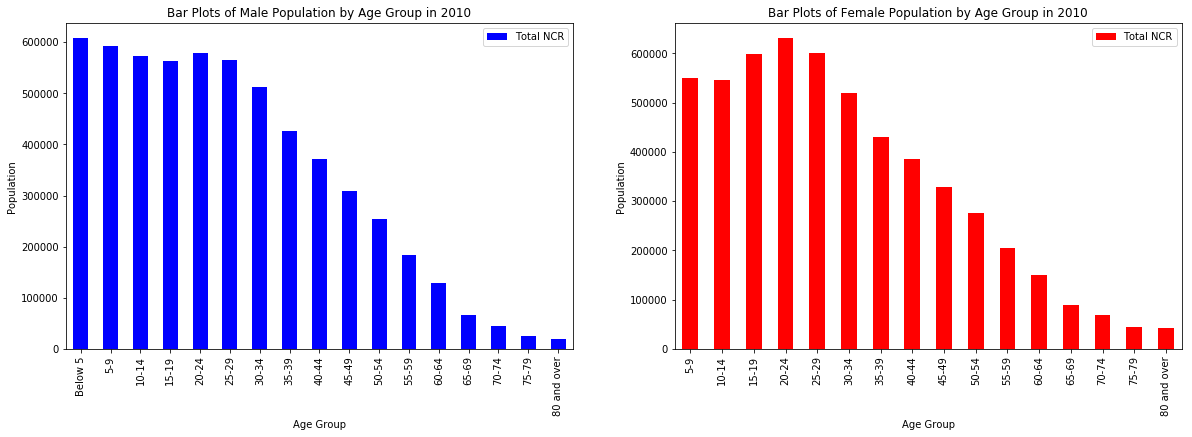

In [119]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_pop_male_total.plot(kind='bar', color='blue', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Bar Plots of Male Population by Age Group in 2010')
ax0.set_xlabel('Age Group')
ax0.set_ylabel('Population')

# Subplot 2: Line plot
df_pop_female_total.plot(kind='bar', color='red', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Bar Plots of Female Population by Age Group in 2010')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Population')

plt.show()

Both of the bar plots for male and female population shows a similar trend wherein the whole population is majorly comprised of younger age groups. As the findings of Lamudi seemingly suggest, the older the age group, the less likely that they will consider purchasing condominium units. This can signify that there is a very good opportunity for developers to dwell on this business.

Now, we will proceed to generate the map of Metro Manila to visualize the geography.

##### Define the geographical coordinates of Metro Manila.

In [111]:
address = 'Metro Manila, PH'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Metro Manila are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Metro Manila are 14.5736108, 121.0329706.


##### Create the dataframe containing all the cities in Metro Manila. 
Dataframe from the PSA that has been imported will be used.

In [20]:
cities = pd.DataFrame(df_pop_demo.iloc[:, 0])
cities['City'] = cities['City'].map(lambda x: x.lstrip('City of'))
cities.iloc[6] = 'Caloocan City'
cities

,City
0,Manila
1,Mandaluyong
2,Marikina
3,Pasig
4,Quezon City
5,San Juan
6,Caloocan City
7,Malabon
8,Navotas
9,Valenzuela


##### Make a list of the geographical coordinates for all of the cities.

In [21]:
latitude_list = []
longitude_list = []

for location in cities['City']:
    address_ = location + ', PH'
    
    geolocator_ = Nominatim(user_agent="ny_explorer")
    location_ = geolocator.geocode(address_)
    latitude_ = location_.latitude
    longitude_ = location_.longitude
    latitude_list.append(latitude_)
    longitude_list.append(longitude_)

###### Add the latitude and longitude dataset in the dataframe.

In [22]:
cities["Latitude"] = latitude_list
cities["Longitude"] = longitude_list
cities

,City,Latitude,Longitude
0,Manila,14.590622,120.979970
1,Mandaluyong,14.577781,121.033230
2,Marikina,14.633108,121.099354
3,Pasig,14.560550,121.076425
4,Quezon City,14.650991,121.048615
5,San Juan,14.604740,121.030049
6,Caloocan City,14.657129,120.984107
7,Malabon,14.674725,120.958105
8,Navotas,14.657186,120.947969
9,Valenzuela,14.707735,120.946172


##### Generate a map of Metro Manila with city labels using Folium.

In [23]:
map_metromanila = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, city in zip(cities['Latitude'], cities['Longitude'], cities['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_metromanila)  

map_metromanila

This is the map of Metro Manila with the cities pinned with blue labels. 

### Explore the neighborhood around the cities of Metro Manila.
1. Utilize the Foursquare API to get information of the venues around Metro Manila.
2. Use k-Means clustering technique in finding the relationship of the cities.

##### Define the CLIENT ID, CLIENT SECRET and VERSION.

In [24]:
CLIENT_ID = 'PUTQA5UODRTK5KZOZ0WH3A3QDSLQ01IO2TXKKPZRNTM2F2LU' # your Foursquare ID
CLIENT_SECRET = 'TZWX0GXSSRWQZOAXGMLMHSUGX5RPUYYBGRF3OBNHUYT3DZZU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PUTQA5UODRTK5KZOZ0WH3A3QDSLQ01IO2TXKKPZRNTM2F2LU
CLIENT_SECRET:TZWX0GXSSRWQZOAXGMLMHSUGX5RPUYYBGRF3OBNHUYT3DZZU


##### Get the top 100 venues that are in each city within a radius of 3.0 kilometers.

In [28]:
radius = 3000 # 3.0 kilometers
LIMIT = 100 # maximum of 100 vanues per location

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Run the getNearbyVenues function using the cities dataframe.

In [29]:
metromanila_venues = getNearbyVenues(names=cities['City'],
                                   latitudes=cities['Latitude'],
                                   longitudes=cities['Longitude']
                                  )

Manila
Mandaluyong
Marikina
Pasig
Quezon City
San Juan
Caloocan City
Malabon
Navotas
Valenzuela
Las Pinas
Makati
Muntinlupa
Paranaque
Pasay City
Pateros
Taguig City


In [30]:
print(metromanila_venues.shape)
metromanila_venues.head()

(407, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manila,14.590622,120.97997,Adobo Connection,14.590246,120.982349,Filipino Restaurant
1,Manila,14.590622,120.97997,The Bayleaf Hotel,14.589945,120.978808,Hotel
2,Manila,14.590622,120.97997,Skydeck Lounge,14.589915,120.978756,Roof Deck
3,Manila,14.590622,120.97997,The French Baker,14.590214,120.983140,Bakery
4,Manila,14.590622,120.97997,Kainan sa Walls sa Intramuros!,14.591826,120.978170,Asian Restaurant


Venues within 3km radius from the coordinates of the city has been appended in the dataframe and the latitude, longitude and category have been identified for each venue.

##### Group the dataframe based on City and count the number of venues for each.

In [32]:
metromanila_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Caloocan City,32,32,32,32,32,32
Las Pinas,9,9,9,9,9,9
Makati,78,78,78,78,78,78
Malabon,1,1,1,1,1,1
Mandaluyong,34,34,34,34,34,34
Manila,79,79,79,79,79,79
Marikina,33,33,33,33,33,33
Muntinlupa,18,18,18,18,18,18
Navotas,17,17,17,17,17,17


In [33]:
print('There are {} uniques categories.'.format(len(metromanila_venues['Venue Category'].unique())))

There are 113 uniques categories.


##### One hot encoding is done using get_dummies function to convert the Venue Category data into a boolean type to be used for screening frequency of each category.

In [34]:
# one hot encoding
metromanila_onehot = pd.get_dummies(metromanila_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
metromanila_onehot['City'] = metromanila_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [metromanila_onehot.columns[-1]] + list(metromanila_onehot.columns[:-1])
metromanila_onehot = metromanila_onehot[fixed_columns]

metromanila_onehot.head()

,City,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,...,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toll Plaza,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar
0,Manila,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Manila,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manila,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Manila,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Manila,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
metromanila_onehot.shape

(407, 114)

In [37]:
metromanila_grouped = metromanila_onehot.groupby('City').mean().reset_index()
metromanila_grouped

,City,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,...,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toll Plaza,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar
0,Caloocan City,0.000000,0.000000,0.03125,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Las Pinas,0.111111,0.000000,0.00000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,Makati,0.000000,0.000000,0.00000,0.0,0.012821,0.012821,0.000000,0.000000,0.025641,...,0.012821,0.025641,0.000000,0.000000,0.000000,0.000000,0.012821,0.012821,0.00,0.012821
3,Malabon,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Mandaluyong,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.029412,0.000000,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,Manila,0.012658,0.012658,0.00000,0.0,0.012658,0.037975,0.000000,0.000000,0.037975,...,0.000000,0.000000,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Marikina,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.090909,0.000000,0.030303,...,0.000000,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Muntinlupa,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,Navotas,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.058824,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Paranaque,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


##### Top 5 Venues Categories for each city will be identified.

In [38]:
num_top_venues = 5

for hood in metromanila_grouped['City']:
    print("----"+hood+"----")
    temp = metromanila_grouped[metromanila_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Caloocan City----
                  venue  freq
0  Fast Food Restaurant  0.31
1    Chinese Restaurant  0.16
2   Japanese Restaurant  0.06
3           Supermarket  0.06
4     Convenience Store  0.06


----Las Pinas----
                    venue  freq
0     American Restaurant  0.11
1                    Park  0.11
2             Snack Place  0.11
3  Furniture / Home Store  0.11
4                Tea Room  0.11


----Makati----
                 venue  freq
0          Coffee Shop  0.06
1           Restaurant  0.06
2       Clothing Store  0.05
3  Filipino Restaurant  0.05
4                 Café  0.05


----Malabon----
                 venue  freq
0                 Park   1.0
1  American Restaurant   0.0
2                Hotel   0.0
3                Plaza   0.0
4          Pizza Place   0.0


----Mandaluyong----
                  venue  freq
0   Filipino Restaurant  0.12
1     Convenience Store  0.06
2  Gym / Fitness Center  0.06
3                Bakery  0.06
4           Pizza Place  0.06



##### Function to sort the frequency of the Venue Category and return the data.

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

###### Generate the Top 5 Venue Categories in a dataframe.

In [43]:

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = metromanila_grouped['City']

for ind in np.arange(metromanila_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(metromanila_grouped.iloc[ind, :], num_top_venues)
city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Caloocan City,Fast Food Restaurant,Chinese Restaurant,Bookstore,Japanese Restaurant,Café
1,Las Pinas,American Restaurant,BBQ Joint,Park,Bubble Tea Shop,Snack Place
2,Makati,Restaurant,Coffee Shop,Filipino Restaurant,Café,Clothing Store
3,Malabon,Park,Wine Bar,Creperie,Dance Studio,Department Store
4,Mandaluyong,Filipino Restaurant,Pizza Place,Gym / Fitness Center,Bakery,Convenience Store


##### Fit and generate the clusters using k-Means clustering algorithm.

In [83]:
# set number of clusters
kclusters = 4

metromanila_grouped_clustering = metromanila_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(metromanila_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 1, 3, 0, 0, 0, 0, 2], dtype=int32)

##### Insert the clustering labes in the dataframe.

In [85]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

metromanila_merged = cities

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
metromanila_merged = metromanila_merged.join(city_venues_sorted.set_index('City'), on='City')

metromanila_merged.head(50)
#city_venues_sorted.drop(columns=["Cluster Labels"], axis=1, inplace=True)

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Manila,14.590622,120.979970,0,Fast Food Restaurant,Filipino Restaurant,Pizza Place,Café,Coffee Shop
1,Mandaluyong,14.577781,121.033230,3,Filipino Restaurant,Pizza Place,Gym / Fitness Center,Bakery,Convenience Store
2,Marikina,14.633108,121.099354,0,Fast Food Restaurant,BBQ Joint,Pizza Place,Chinese Restaurant,Fried Chicken Joint
3,Pasig,14.560550,121.076425,3,Convenience Store,Pizza Place,Café,Donut Shop,Chinese Restaurant
4,Quezon City,14.650991,121.048615,3,Filipino Restaurant,Cosmetics Shop,National Park,Bike Rental / Bike Share,Japanese Restaurant
5,San Juan,14.604740,121.030049,3,Convenience Store,Pet Store,Diner,Grocery Store,Basketball Stadium
6,Caloocan City,14.657129,120.984107,0,Fast Food Restaurant,Chinese Restaurant,Bookstore,Japanese Restaurant,Café
7,Malabon,14.674725,120.958105,1,Park,Wine Bar,Creperie,Dance Studio,Department Store
8,Navotas,14.657186,120.947969,0,Fast Food Restaurant,Market,Restaurant,Café,Gym
9,Valenzuela,14.707735,120.946172,3,Food & Drink Shop,Chinese Restaurant,Pharmacy,Bar,Tea Room


## Results <a name="Results"></a>

##### Generate the map with the cities around Metro Manila pinned and segregrated through colors by cluster.

In [125]:
# create map
map_city_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(metromanila_merged['Latitude'], metromanila_merged['Longitude'], metromanila_merged['City'], metromanila_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_city_clusters)
       
map_city_clusters

In [95]:
metromanila_merged['Cluster Labels'].value_counts()

3    8
0    6
2    2
1    1
Name: Cluster Labels, dtype: int64

## Cluster 1
This cluster is mainly composed of cities with many fast food restaurants in the neighborhood.

In [88]:
metromanila_merged.loc[metromanila_merged['Cluster Labels'] == 0, metromanila_merged.columns[[0] + list(range(3, metromanila_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Manila,0,Fast Food Restaurant,Filipino Restaurant,Pizza Place,Café,Coffee Shop
2,Marikina,0,Fast Food Restaurant,BBQ Joint,Pizza Place,Chinese Restaurant,Fried Chicken Joint
6,Caloocan City,0,Fast Food Restaurant,Chinese Restaurant,Bookstore,Japanese Restaurant,Café
8,Navotas,0,Fast Food Restaurant,Market,Restaurant,Café,Gym
12,Muntinlupa,0,Fast Food Restaurant,Pizza Place,Bakery,Coffee Shop,Sandwich Place
16,Taguig City,0,Fast Food Restaurant,Fried Chicken Joint,Bakery,Shopping Mall,Steakhouse


## Cluster 2
This cluster is only includes Malabon City where parks and wine bars are the most common venues. 

In [89]:
metromanila_merged.loc[metromanila_merged['Cluster Labels'] == 1, metromanila_merged.columns[[0] + list(range(3, metromanila_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Malabon,1,Park,Wine Bar,Creperie,Dance Studio,Department Store


## Cluster 3
This cluster is composed of cities with many convenience stores in the neighborhood.

In [90]:
metromanila_merged.loc[metromanila_merged['Cluster Labels'] == 2, metromanila_merged.columns[[0] + list(range(3, metromanila_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,Paranaque,2,Convenience Store,Snack Place,Dessert Shop,Seafood Restaurant,Fast Food Restaurant
15,Pateros,2,Convenience Store,Fast Food Restaurant,Plaza,Tea Room,Diner


## Cluster 4
This cluster is composed of cities with a mix of venues from restaurants, conveniences stores and hotels.

In [91]:
metromanila_merged.loc[metromanila_merged['Cluster Labels'] == 3, metromanila_merged.columns[[0] + list(range(3, metromanila_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Mandaluyong,3,Filipino Restaurant,Pizza Place,Gym / Fitness Center,Bakery,Convenience Store
3,Pasig,3,Convenience Store,Pizza Place,Café,Donut Shop,Chinese Restaurant
4,Quezon City,3,Filipino Restaurant,Cosmetics Shop,National Park,Bike Rental / Bike Share,Japanese Restaurant
5,San Juan,3,Convenience Store,Pet Store,Diner,Grocery Store,Basketball Stadium
9,Valenzuela,3,Food & Drink Shop,Chinese Restaurant,Pharmacy,Bar,Tea Room
10,Las Pinas,3,American Restaurant,BBQ Joint,Park,Bubble Tea Shop,Snack Place
11,Makati,3,Restaurant,Coffee Shop,Filipino Restaurant,Café,Clothing Store
14,Pasay City,3,Hotel,Breakfast Spot,Café,Art Gallery,Asian Restaurant


## Discussion <a name="Discussion"></a>
**Cluster 1**

Cities in Cluster 1 have a lot of surrounding fast food restaurants. This is probably caused by the volume of casual diners around the area. It can be attributed to these places being major residential areas where daily food consumption demand is in constant high. Congestion around these areas is very probably. This area could be very attractive to people with fast-paced activities in the metro.

**Cluster 2**

This cluster is only composed of one city which is Malabon. In contrast to cluster 1, the city hosts venues that caters leisure activities. This area is likely suitable to lain back population where relaxing time is prioritized.

**Cluster 3**

Paranaque and Pateros compose this cluster where convenience stores and casual dining places are the most common venues. Essentials are easily accessible and these areas can definitely cater basic daily needs which is suitable for people who are always on-the-go.

**Cluster 4**

The cities in this cluster is composed of various venues that cater to a broad array of needs from basic needs to leisure activities. It is very likely that these areas could become high-demand.

As seen in the map, cities in Cluster 4 are located in the center of Metro Manila. This somehow explains why the venues are very mixed on those areas as those are very strategic for businesses. There is better reach to consumers in these areas compared to the ones at the outer locations. In comparison, cities in Cluster 1 are located at the outer areas of Metro Manila. Though these are not in the center of the metropolitan, this suggests that there is still a lot of foot-traffic around edges.

These findings may help condominium developers in conceptualizing plans on where to do their next project. If the target market is for people who are always on-the-go such as students and young professionals, cities in Cluster 4 or Cluster 3 may be recommended with the completeness of the services around the area. If the idea is to have a budget-friendly condominium to target consumers who have limited spending behaviors, cities in Cluster 1 can be recommended as the neighboring establishments can very well compliment with the needs of the customers. Cluster 3 may be for customers who are leaning towards a laid-back neighborhood where they can utilize leisure establishments. Likely customers would be middle-aged and older population who wants to settle down.

## Conclusion and Recommendations <a name="Conclusion"></a>
Recommendations on the type of condominium to be developed were established where Clusters 3 and 4 can leverage on the completeness of the different services around the area, Cluster 1 for budget-friendly customers, and Cluster 3 for customers seeking leisure activities.

To further the findings in this study, it is recommended to do another k-Means clustering algorithm for specific cities of interest. Generating a heat map for each city factoring the venue categories may give more insights of the areas.

## Acknowledgement <a name="Acknowledgement"></a>

Great course learning materials by IBM team. Thank you!